<ul>
<li> Every answer must be one line of python code
</ul>

In [96]:
import numpy as np

Here is a matrix, A, represented as a list of list

In [97]:
A = [[ 0,  1,  2,  3],
     [ 4,  5,  6,  7],
     [ 8,  9, 10, 11]]

Create a numpy tensor from A, call it A

In [98]:
A = np.array(A)

Evaluate the shape of A

In [99]:
A.shape

(3, 4)

Here is a vector, u, represented as a list

In [100]:
u = [2,3,2,3]

Create a numpy tensor from u, call it u

In [101]:
u = np.array(u)

Evaluate the mean of u

In [102]:
u.mean()

2.5

Evaluate the standard deviation of u

In [103]:
u.std()

0.5

Evaluate the sum of A by columns

In [104]:
A.sum(axis=0)

array([12, 15, 18, 21])

Evaluate the sum of A by rows

In [105]:
A.sum(axis=1)

array([ 6, 22, 38])

Evaluate the square root of the cube of u

In [106]:
np.sqrt(np.power(u,3))

array([2.82842712, 5.19615242, 2.82842712, 5.19615242])

Extract the second row of A

In [107]:
A[1,:]

array([4, 5, 6, 7])

Drop the last 2 columns of A

In [109]:
A[:,:-2]

array([[0, 1],
       [4, 5],
       [8, 9]])

Drop the 3rd colum of A

In [111]:
A[:,(0,1,3)]

array([[ 0,  1,  3],
       [ 4,  5,  7],
       [ 8,  9, 11]])

We're going to produce a plot

In [112]:
from matplotlib.pyplot import plot

Create a vector x of values from 0 to 10, by increment of 0.1

In [113]:
x = np.arange(0,10.1,0.1)

plot sin of x

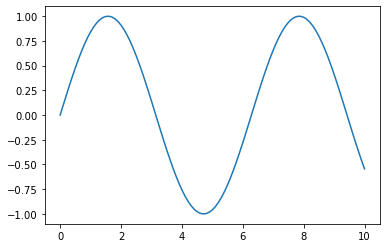

In [114]:
plot(x,np.sin(x))

Here's your sklearn toolbox

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

Let's play with the boston dataset

In [116]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

Split the data into a train and test set. Call them X_train/X_test/y_train/y_test

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

We're going to produce a scatter plot

In [118]:
from matplotlib.pyplot import scatter

Compute D, the 2D projection by PCA of the training data

In [119]:
D = PCA(n_components=2).fit_transform(X_train, y_train)

Evaluate the shape of D

In [120]:
D.shape

(379, 2)

Create a scatter plot for D

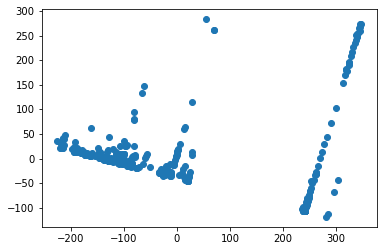

In [121]:
scatter(D[:,0],D[:,1])

Create a linear regression model, call it model

In [122]:
model = LinearRegression()

Train your model

In [123]:
model.fit(D, y_train)

LinearRegression()

Evaluate the mean absolute error of your model on the test data

In [131]:
mean_absolute_error(y_test, model.predict(PCA(n_components=2).fit(X_train,y_train).transform(X_test)))

5.698884660094039

Create a pipeline composed of PCA followed by a linear regression

In [125]:
pipe = Pipeline([('pca', PCA()),('lr', LinearRegression())])

Here's the list of number of PCA components we will consider

In [126]:
range = [2,4,6,8,10,12]

Compute the train and validation loss of your pipeline with the number of components of PCA 'n_components' with values in range as defined above. Call then train_loss and valid_loss. The error should be measured by mean absolute error.

In [127]:
train_loss, valid_loss = validation_curve(pipe, X_train, y_train, param_name='pca__n_components', param_range=range, scoring=make_scorer(mean_absolute_error))

Evaluate the shape of train_loss

In [128]:
train_loss.shape

(6, 5)

Plot the train loss as a function of the number of components of PCA

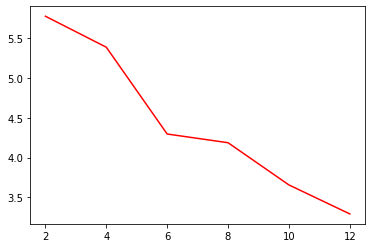

In [129]:
plot(range, train_loss.mean(axis=1), color='r')

You're done! Please upload your notebook back on canvas.